In [43]:
# import sys
# sys.path.insert(0,'/home/idnm/Programming projects/jax_circuits')
from jax_circuits import *
from topology import *
from qiskit import QuantumCircuit
from qiskit.circuit.library import *

# Assembling

## Toffoli 5 without ancilla

We can find decomposition of Toffoli 5 without ancilla qubits using the following representation.

True


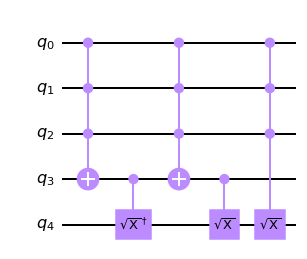

In [44]:
qc = QuantumCircuit(5)
qc.mct([0,1,2], 3)
qc.append(SXGate().inverse().control(1), [3,4])
qc.mct([0,1,2], 3)
qc.append(SXGate().control(1), [3,4])
qc.append(SXGate().control(3), [0,1,2,4])
print(jnp.allclose(Operator(qc.reverse_bits()).data, u_toff5))
qc.draw(output='mpl')

In place of Toffoli 4 gates proper one can use relative phase Toffoli gates (On a fully connected topology they only 6 CNOT gates. I was not able to imporove this result allowing for an arbitrary 3-qubit unitary on control qubits. Note that if the unitary touches the target the result can be further improved to 4 CNOT gates). 

1.2942249e-31


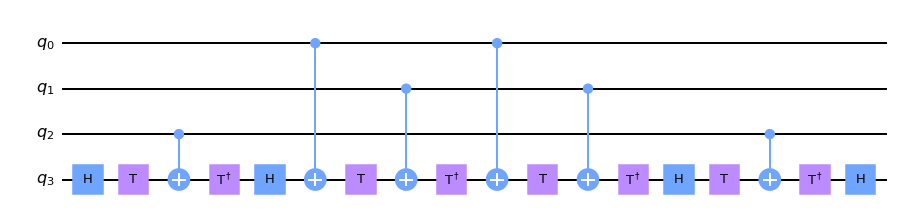

In [52]:
qc = QuantumCircuit(4)

qc.h(3)
qc.t(3)
qc.cx(2, 3)
qc.tdg(3)
qc.h(3)
qc.cx(0, 3)
qc.t(3)
qc.cx(1, 3)
qc.tdg(3)
qc.cx(0, 3)
qc.t(3)
qc.cx(1, 3)
qc.tdg(3)
qc.h(3)
qc.t(3)
qc.cx(2,3)
qc.tdg(3)
qc.h(3)

u_toff4_relative = Operator(qc.reverse_bits()).data
print(disc_modulo_diagonal(u_toff4, u_toff4_relative, 4, [0, 1, 2, 3]))
qc.draw(output='mpl')

It remains to find an efficient decomposition of the controlled $\sqrt{X}$ gate. This is where we use our program -- it was able to find a 14-CNOT decomposition of the controlled $\sqrt{X}$ gate, the same complexity as the controlled $X$ itself. This gives in total 6+2+6+2+14=30 CNOT gates. The best 5-qubit Toffoli without ancilla decomposition known to me requires 36 CNOT gates.

# Decomposing

# Comparing